# Intro to Pandas, Reading Data, and Plotting

The cell below loads up a few libraries and does some initialization.  In this notebook we'll do a few basic data manipulations and see the Pandas formatting for the first time and make some simple graphs.


In [2]:
### Standard Magic and startup initializers.

# Load Numpy
import numpy as np
# Load MatPlotLib
import matplotlib
import matplotlib.pyplot as plt
# Load Pandas
import pandas as pd

# This lets us show plots inline and also save PDF plots if we want them
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
matplotlib.style.use('fivethirtyeight')
# Seaborn is a plotting package for Pandas that we'll try out...
import seaborn as sns

# Make the fonts a little bigger..
font = {'size'   : 24}
matplotlib.rc('font', **font)
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['pdf.fonttype'] = 42

# These two things are for Pandas, it widens the notebook and lets us display data easily.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Working with some real data and Pandas!

Opening and reading CSV files is very easy with Pandas [Read CSV Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [4]:
# Open the NBA Salaries file.

df_nba = pd.read_csv("./data/nba_salaries.csv")

In [5]:
# Display gives us a basic table.  Note that we can index and slice this in many different ways.
display(df_nba[:5])

,PLAYER,POSITION,TEAM,'15-'16 SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
2,Tiago Splitter,C,Atlanta Hawks,9.756250
3,Jeff Teague,PG,Atlanta Hawks,8.000000
4,Kyle Korver,SG,Atlanta Hawks,5.746479


In [7]:
# Look at a specific person... a little clunky.
df_nba.loc[df_nba['PLAYER'] == "Stephen Curry"]

,PLAYER,POSITION,TEAM,'15-'16 SALARY
121,Stephen Curry,PG,Golden State Warriors,11.370786


In [8]:
# Can filter for a whole set
df_nba.loc[df_nba['POSITION'] == "PG"][:5]

# Again note that we can slice this different ways..

,PLAYER,POSITION,TEAM,'15-'16 SALARY
3,Jeff Teague,PG,Atlanta Hawks,8.000000
8,Dennis Schroder,PG,Atlanta Hawks,1.763400
14,Avery Bradley,PG,Boston Celtics,7.730337
15,Isaiah Thomas,PG,Boston Celtics,6.912869
18,Marcus Smart,PG,Boston Celtics,3.431040


In [9]:
# Can also see a team...
df_nba.loc[df_nba['TEAM'] == "New Orleans Pelicans"]

,PLAYER,POSITION,TEAM,'15-'16 SALARY
239,Eric Gordon,SG,New Orleans Pelicans,15.514031
240,Tyreke Evans,SG,New Orleans Pelicans,10.734586
241,Jrue Holiday,PG,New Orleans Pelicans,10.595507
242,Omer Asik,C,New Orleans Pelicans,9.213483
243,Ryan Anderson,PF,New Orleans Pelicans,8.500000
244,Anthony Davis,PF,New Orleans Pelicans,7.070730
245,Alexis Ajinca,C,New Orleans Pelicans,4.389607
246,Quincy Pondexter,SF,New Orleans Pelicans,3.382023
247,Norris Cole,PG,New Orleans Pelicans,3.036927
248,Dante Cunningham,PF,New Orleans Pelicans,2.850000


In [10]:
# Look at all PGs sorted by salary...
df_nba.loc[df_nba['POSITION'] == "PG"].sort_values("'15-'16 SALARY", ascending=False)[:5]

,PLAYER,POSITION,TEAM,'15-'16 SALARY
156,Chris Paul,PG,Los Angeles Clippers,21.468695
60,Derrick Rose,PG,Chicago Bulls,20.093064
269,Russell Westbrook,PG,Oklahoma City Thunder,16.744218
74,Kyrie Irving,PG,Cleveland Cavaliers,16.407501
400,John Wall,PG,Washington Wizards,15.851950


Note that the above sorting does not happen *in place* unless we explicitly tell Pandas to do so -- [Documentation for sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

In [11]:
# Once we sort by values it does not stay the same unless we overwrite the table or do it in place...
df_nba.loc[df_nba['POSITION'] == "PG"][:5]

,PLAYER,POSITION,TEAM,'15-'16 SALARY
3,Jeff Teague,PG,Atlanta Hawks,8.000000
8,Dennis Schroder,PG,Atlanta Hawks,1.763400
14,Avery Bradley,PG,Boston Celtics,7.730337
15,Isaiah Thomas,PG,Boston Celtics,6.912869
18,Marcus Smart,PG,Boston Celtics,3.431040


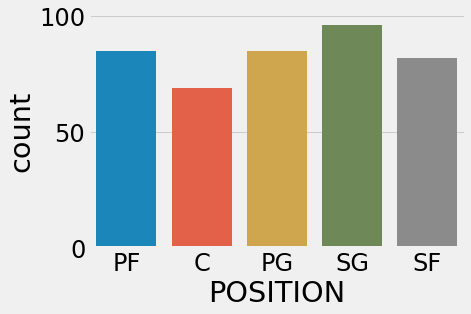

In [12]:
# Maybe see what the position distribution is...
sns.countplot(df_nba['POSITION'])

## We can also use Pandas to read a CSV that is online... 


In [13]:
#df_class_survey = pd.read_csv("./Data Science Day 1 Questions (Responses) - Form Responses 1.csv")

# We can also read directly from a google sheet if we want.  Note that at the end we have to add `/export?gid=1081980213&format=csv`
# The gid field tell us what sheet to load and the format gives us csv
df_class_survey = pd.read_csv("https://docs.google.com/spreadsheets/d/1d4C9HEIOkL7x_W4rYCRsflt_Mw7I6DGLUbAAUwwIqUM/export?gid=1081980213&format=csv")

KeyboardInterrupt: 

In [ ]:
df_class_survey[:5]

In [ ]:
# Maybe see what the position distribution is...
sns.countplot(df_class_survey['I use Jupyter Notebooks'])


In [ ]:
# Maybe see what the position distribution is...
g = sns.countplot(df_class_survey['I use Jupyter Notebooks'])
g.set_xticklabels(g.get_xticklabels(),rotation=-85)
display(g)

# That was fun, let's try to read some books...

In [14]:
from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In [15]:

# Read two books, fast!

huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

In [16]:
huck_finn_chapters[2]

'III. WELL, I got a good going-over in the morning from old Miss Watson on account of my clothes; but the widow she didn\'t scold, but only cleaned off the grease and clay, and looked so sorry that I thought I would behave awhile if I could. Then Miss Watson she took me in the closet and prayed, but nothing come of it. She told me to pray every day, and whatever I asked for I would get it. But it warn\'t so. I tried it. Once I got a fish-line, but no hooks. It warn\'t any good to me without hooks. I tried for the hooks three or four times, but somehow I couldn\'t make it work. By and by, one day, I asked Miss Watson to try for me, but she said I was a fool. She never told me why, and I couldn\'t make it out no way. I set down one time back in the woods, and had a long think about it. I says to myself, if a body can get anything they pray for, why don\'t Deacon Winn get back the money he lost on pork? Why can\'t the widow get back her silver snuffbox that was stole? Why can\'t Miss Wats

In [17]:
# Turn it into a data frame..
df_huck = pd.DataFrame(huck_finn_chapters, columns=["Text"])

In [18]:
display(df_huck[:5])

,Text
0,I. YOU don't know about me without you have re...
1,II. WE went tiptoeing along a path amongst the...
2,"III. WELL, I got a good going-over in the morn..."
3,"IV. WELL, three or four months run along, and ..."
4,V. I had shut the door to. Then I turned aroun...


In [19]:
# Count how many times we see each character...
# Here we make a data frame out of a dictionary where the index is the column name
# and the values are the column
counts = pd.DataFrame({
        'Jim':np.char.count(huck_finn_chapters, 'Jim'),
        'Tom':np.char.count(huck_finn_chapters, 'Tom'),
        'Huck':np.char.count(huck_finn_chapters, 'Huck')
    })

In [20]:
counts[:5]

,Jim,Tom,Huck
0,0,6,3
1,16,24,2
2,0,5,2
3,8,0,1
4,0,0,0


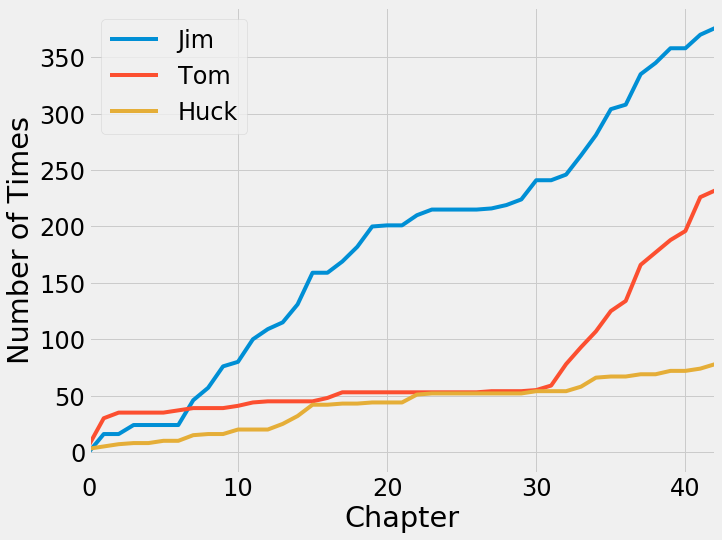

In [21]:
ax = counts.cumsum().plot(figsize=(10,8))
ax.set_xlabel("Chapter")
ax.set_ylabel("Number of Times")
#ax.set_ylim((-5,310))
plt.show()

There are lots of options for the figures ... Note that here we are using [Pandas Plot](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html) which is a wrapper around [MatPlot's Plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html).

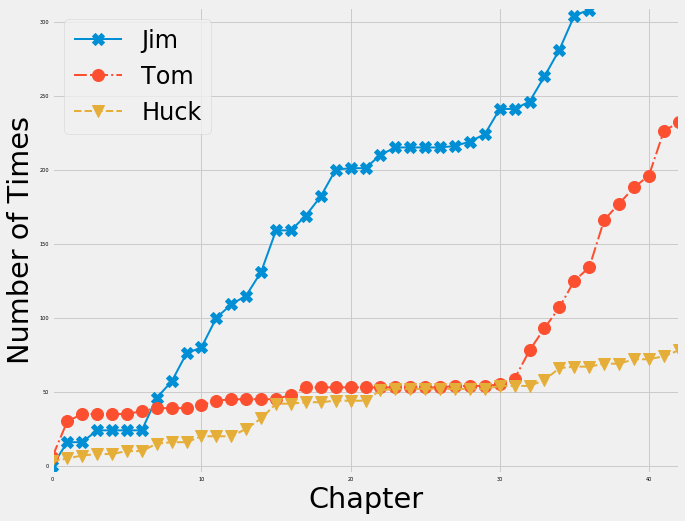

In [22]:
ax = counts.cumsum().plot(figsize=(10,8), fontsize=(5),
                                          lw=2, 
                                          markersize=12,
                                          style=['X-','o-.','v--','s:','d:','*-.'])
ax.set_xlabel("Chapter")
ax.set_ylabel("Number of Times")
ax.set_ylim((-5,310))
plt.show()

In [23]:
# Now for Little women...

people = ['Amy', 'Beth', 'Jo', 'Laurie', 'Meg']
people_counts = {pp: np.char.count(little_women_chapters, pp) for pp in people}


In [24]:
people_counts.keys()

dict_keys(['Amy', 'Beth', 'Jo', 'Laurie', 'Meg'])

In [25]:
people_counts['Beth']

array([26, 12,  2, 18, 14, 28,  5,  9,  5,  5, 20, 20, 13,  5, 12,  9, 29,
       30,  7,  7,  1, 15,  6,  9,  6,  5,  4,  0,  1,  5,  3, 33,  6,  2,
        3, 37,  1,  0,  1, 21,  7,  9,  8,  0,  2,  1,  3])

In [26]:
# Make a pandas table...
counts = pd.DataFrame(people_counts)
counts[:5]

,Amy,Beth,Jo,Laurie,Meg
0,23,26,44,0,26
1,13,12,21,0,20
2,2,2,62,16,36
3,14,18,34,0,17
4,6,14,55,35,13


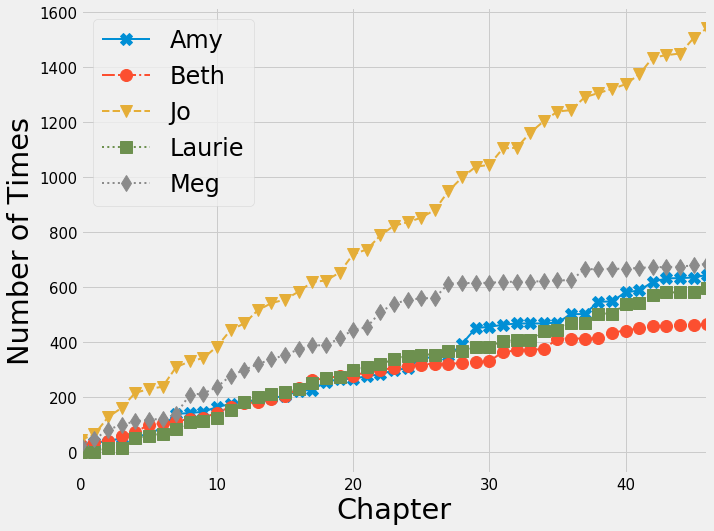

In [27]:
ax = counts.cumsum().plot(figsize=(10,8), fontsize=(15),
                                          lw=2, 
                                          markersize=12,
                                          style=['X-','o-.','v--','s:','d:','*-.'])
ax.set_xlabel("Chapter")
ax.set_ylabel("Number of Times")
plt.show()

## Something more fun...

Inspired by the [Inferential Thinking Book](https://www.inferentialthinking.com/chapters/01/3/2/Another_Kind_Of_Character) let's do some more analysis on the text that we have loaded up.

First let's count the number of periods and the total number of characters in each of the books.

In [28]:
# Recall that each element in the array corresponds to a chapter.
print(huck_finn_chapters[0][:50])
print(little_women_chapters[0][:50])

I. YOU don't know about me without you have read a
ONE PLAYING PILGRIMS "Christmas won't be Christmas


In [29]:
chars_periods_huck_finn = pd.DataFrame({
        'Huck Finn Chapter Length':[len(s) for s in huck_finn_chapters],
        'Number of Periods':np.char.count(huck_finn_chapters, '.')
        })
chars_periods_little_women = pd.DataFrame({
        'Little Women Chapter Length': [len(s) for s in little_women_chapters],
        'Number of Periods': np.char.count(little_women_chapters, '.')
        })

In [30]:
display(chars_periods_huck_finn[:5])
display(chars_periods_little_women[:5])

,Huck Finn Chapter Length,Number of Periods
0,7026,66
1,11982,117
2,8529,72
3,6799,84
4,8166,91


,Little Women Chapter Length,Number of Periods
0,21759,189
1,22148,188
2,20558,231
3,25526,195
4,23395,255


What do we notice about the above?  It seems like *Little Women* is significantly longer per chapter than *Huck Finn*.  Let's try plotting this relationship on the same graph.

To do this we are going to use the `scatter` function from [MatPlotLib](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html)

In [33]:
plt.figure(figsize=(6, 6))
plt.scatter(chars_periods_huck_finn["Number of Periods"], 
              chars_periods_huck_finn["Huck Finn Chapter Length"], 
              color='darkblue')

plt.scatter(chars_periods_little_women["Number of Periods"], 
              chars_periods_little_women["Little Women Chapter Length"], 
              color='gold')

plt.xlabel('Number of periods in chapter')
plt.ylabel('Number of characters in chapter')

KeyError: 'Number of Periods'

<Figure size 432x432 with 0 Axes>

The above plot shows us a few things:
1. Little Women is much longer on average than Huck
2. There seems to be a linear relationship between the number of characters and the number of periods

If we look at all the chapters that have 100 periods we see they have 10,000 - 15,000 characters.. or roughly 100-150 characters per sentence.  Seems like a Tweet.

In [32]:
# Let's formally find the relationship...
from scipy import stats

# First let's make the tables the same..
chars_periods_huck_finn.columns = ['characters', 'periods']
chars_periods_little_women.columns = ['characters', 'periods']
display(chars_periods_huck_finn[:5])
len(chars_periods_huck_finn)

,characters,periods
0,7026,66
1,11982,117
2,8529,72
3,6799,84
4,8166,91


43

In [35]:
# Now we are going to concatinate the data together -- this is our first join operation!

merged = pd.concat([chars_periods_huck_finn, chars_periods_little_women])
merged

,characters,periods
0,7026,66
1,11982,117
2,8529,72
3,6799,84
4,8166,91
5,14550,125
6,13218,127
7,22208,249
8,8081,71
9,7036,70


In [36]:
len(merged)

90

In [37]:
slope, intercept, r_value, p_value, std_err = stats.linregress(merged['periods'],merged['characters'])

In [38]:
slope

89.0611539393866

In [39]:
intercept

3664.067173280624

In [40]:
r_value

0.9233365944610994

In [41]:
p_value

2.413147744447107e-38

In [42]:
std_err

3.9482862802859104

In [43]:
line = slope * merged['periods'] + intercept

Now we can add the line above to our plot using the [plot function](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html).

Text(0, 0.5, 'Number of characters in chapter')

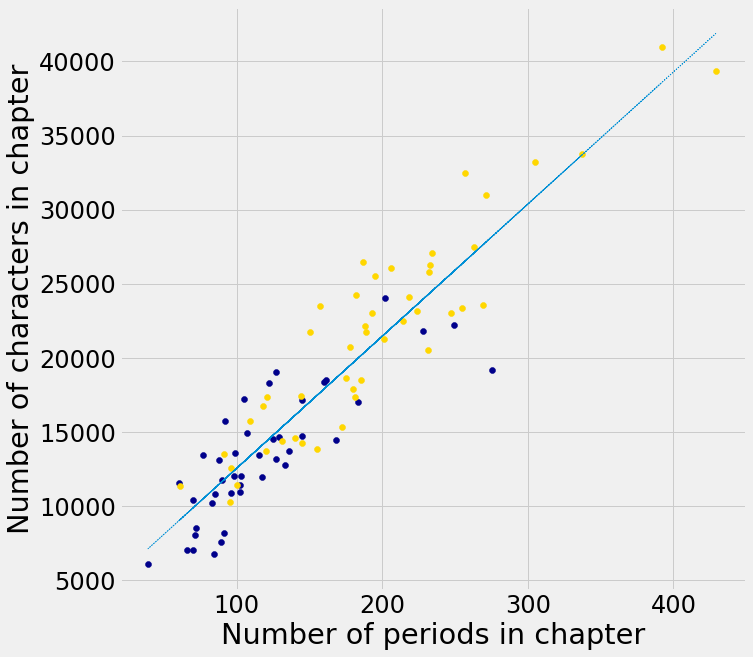

In [44]:
plt.figure(figsize=(10, 10))
plt.scatter(chars_periods_huck_finn["periods"], 
              chars_periods_huck_finn["characters"], 
              color='darkblue')

plt.scatter(chars_periods_little_women["periods"], 
              chars_periods_little_women["characters"], 
              color='gold')

plt.plot(merged['periods'], line, lw=1, ls=':')

plt.xlabel('Number of periods in chapter')
plt.ylabel('Number of characters in chapter')